## Lead Score Case Study


#### An education company named X Education sells online courses to industry professionals. The goal is here to help them to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted

### Classification based on Logistic Regression

### Steps Involved:

1.Importing Data<br>
2.Inspecting Dataframe<br>
3.Data Preparation<br>
4.Train-Test Split<br>
5.Model Building<br>
6.Feature Selection using RFE<br>
7.Model Evaluation<br>
8.Making Predictions on Test Dataset<br>
9.Inferences & Conclusions

### Step 1: Importing  Data

In [614]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [615]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

In [616]:
# Importing all datasets
lead_df = pd.read_csv("C:/Users/nidhi/Desktop/Upgrad Lecture Note/Lead Scoring Assignment/Leads.csv", na_values=['Select'])
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [617]:
# Let's see the head of  dataset
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 

In [618]:
# Let's check the dimensions of the dataframe
lead_df.shape

(9240, 37)

In [619]:
# let's look at the statistical aspects of the dataframe
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [620]:
# let's look at the statistical aspects of the dataframe

lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [621]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call','Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_df[varlist] = lead_df[varlist].apply(binary_map)

In [622]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [623]:
len(lead_df.index)

9240

#### Checking the Value Count of Categorical Variables

In [624]:
lead_df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [625]:
lead_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
blog                    1
WeLearn                 1
welearnblog_Home        1
testone                 1
Pay per Click Ads       1
youtubechannel          1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [626]:
lead_df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [627]:
lead_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [628]:
lead_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Canada                     4
Germany                    4
Nigeria                    4
Kuwait                     4
South Africa               4
Sweden                     3
Asia/Pacific Region        2
Uganda                     2
Philippines                2
Belgium                    2
Bangladesh                 2
Italy                      2
China                      2
Ghana                      2
Netherlands                2
Denmark                    1
Tanzania                   1
Vietnam                    1
Liberia                    1
Sri Lanka                  1
Indonesia                  1
Switzerland   

In [629]:
lead_df['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [630]:
lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [631]:
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [632]:
lead_df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Approached upfront                 1
Email Received                     1
View in browser link Clicked       1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [633]:
lead_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

#### Checking for missing values

In [634]:
#Checking percentage of missing values in columns

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

###  Treating the missing values

#### Dropping 'What matters most to you in choosing a course'  as per the values count its has no or very less variance &  do not contribute to much information for analysis or to target variable.

#### 'Specialization' & 'Country' columns have high percentage of Null values, thus removing & do not seem as significant features for analysis.

In [635]:
lead_df=lead_df.drop(['What matters most to you in choosing a course', 'Country', 'Specialization'], axis=1)

#### Imputing the NaNs of columns 'What is your current occupation' & 'Tags' with 'NotAvailable' as dropping almost 30% of records is not a good idea, also can not drop this columns as these are Significant feature which may contribute significantly to target variable.

In [636]:


lead_df.fillna({'What is your current occupation': 'NotAvailable'}, inplace=True)



lead_df.fillna({'Tags': 'NotAvailable'}, inplace=True)

In [637]:
# Adding up the missing values (column-wise)

lead_df.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
How did you hear about X Education          7250
What is your current occupation                0
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates

In [638]:
# Checking percentage of missing values after removing the missing values

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
How did you hear about X Education          78.46
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


#### Removing rows with NaNs values corresponding to columns  'Page Views Per Visit', 'Lead Source' & 'TotalVisits' as these have small percentage of missing values and we can get rid of those.

In [639]:
# Removing  NaN rows

lead_df = lead_df[~np.isnan(lead_df['TotalVisits'])]
lead_df = lead_df[~np.isnan(lead_df['Page Views Per Visit'])]


In [640]:
lead_df = lead_df[~pd.isnull(lead_df['Lead Source'])]


####  Removing the columns having more than 30% missing values

In [641]:

missing_columns = lead_df.columns[100*(lead_df.isnull().sum()/len(lead_df.index)) > 30]
print(missing_columns)

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')


In [642]:
lead_df = lead_df.drop(missing_columns, axis=1)
print(lead_df.shape)

(9074, 26)


In [643]:
lead_df.shape

(9074, 26)

In [644]:
# Checking percentage of missing values after removing the missing values

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

#### We have NO NULL values !!! We are good to go!

In [645]:

# Removing  columns looking at dataset & values count, which are not significant for analysis & model building 
# LAst Activity column is same as Last Notable Activity So removing it from dataset

lead_data= lead_df.drop(['Prospect ID','Lead Number', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Notable Activity'], axis=1)

lead_data.shape


(9074, 11)

In [646]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
Lead Origin                        9074 non-null object
Lead Source                        9074 non-null object
Do Not Email                       9074 non-null int64
Do Not Call                        9074 non-null int64
Converted                          9074 non-null int64
TotalVisits                        9074 non-null float64
Total Time Spent on Website        9074 non-null int64
Page Views Per Visit               9074 non-null float64
Last Activity                      9074 non-null object
What is your current occupation    9074 non-null object
Tags                               9074 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 850.7+ KB


In [647]:
lead_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Tags'],
      dtype='object')

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [648]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity','Tags','What is your current occupation']], drop_first=True)

# Adding the results to the master dataframe

lead_data = pd.concat([lead_data, dummy1], axis=1)

In [649]:
lead_data.shape

(9074, 82)

#### Dropping the repeated variables

In [650]:
# We have created dummies for the below variables, so we can drop them

lead_data = lead_data.drop(['Lead Origin','Lead Source','Last Activity','Tags','What is your current occupation'], 1)

In [651]:
lead_data.shape

(9074, 77)

#### Checking for Outliers

In [652]:
# Checking for outliers in the continuous variables

num_lead = lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [653]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


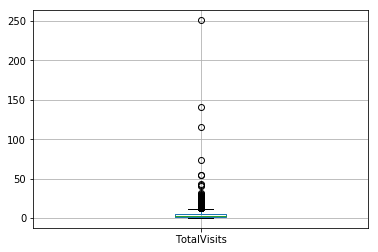

In [654]:
lead_data.boxplot('TotalVisits')

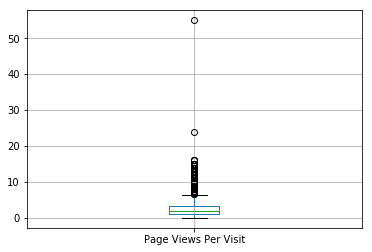

In [655]:
lead_data.boxplot('Page Views Per Visit')

In [656]:
#Removing Outliers

Q1 = lead_data['Page Views Per Visit'].quantile(0.01)
Q3 = lead_data['Page Views Per Visit'].quantile(0.995)
IQR = Q3 - Q1

lead_data = lead_data[~((lead_data['Page Views Per Visit'] < (Q1 - 1.5 * IQR)) |(lead_data['Page Views Per Visit'] > (Q3 + 1.5 * IQR)))]
lead_data.shape

(9073, 77)

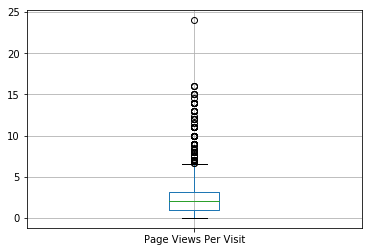

In [657]:
lead_data.boxplot('Page Views Per Visit')

In [658]:
lead_data.columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Op

### Step 4: Test-Train Split

In [659]:
from sklearn.model_selection import train_test_split

In [660]:
# Putting feature variables to X

X = lead_data.drop(['Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,What is your current occupation_Housewife,What is your current occupation_NotAvailable,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [661]:
# Putting response variable to y

y = lead_data['Converted']

y.head()



0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [662]:
y.shape

(9073,)

In [663]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [664]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(6351, 76)
(2722, 76)
(6351,)
(2722,)


### Step 5: Feature Scaling

In [665]:
from sklearn.preprocessing import StandardScaler

In [666]:
scaler = StandardScaler()

X_train[[ 'TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[[ 'TotalVisits','Total Time Spent on Website','Page Views Per Visit',]])

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,What is your current occupation_Housewife,What is your current occupation_NotAvailable,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7113,0,0,-0.112783,0.254733,-0.420088,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4749,0,0,-0.884917,-0.883781,-1.142240,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7986,0,0,-0.884917,-0.883781,-1.142240,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1281,0,0,0.144595,0.923150,-0.179370,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7346,0,0,0.144595,0.864388,-0.660805,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [667]:
### Checking the Converted Rate


Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85958337925714

We have almost 38 % Converted rate. There is No Class imbalance.

### Step 6: Looking at Correlations

In [668]:
# Importing matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

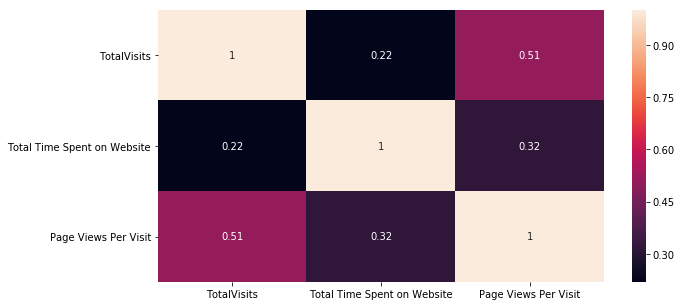

In [669]:

# Let's see the correlation matrix 

plt.figure(figsize = (10,5))        # Size of the figure
sns.heatmap(num_lead.corr(),annot = True)
plt.show()

#### Its evident that TotalVisits & Page Views Per Visit have high correlation

In [670]:
# Let's see the correlation matrix

lead_data.corr()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,What is your current occupation_Housewife,What is your current occupation_NotAvailable,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
Do Not Email,1.000000,-0.004343,-0.140587,0.031939,-0.046094,0.028186,0.099381,-0.031390,-0.016846,0.111746,...,0.062663,0.002714,0.028261,0.070068,-0.009216,0.052496,-0.001833,0.007596,-0.024634,-0.047249
Do Not Call,-0.004343,1.000000,0.019023,0.003228,0.007029,-0.006144,-0.016033,0.026442,-0.000855,-0.009264,...,-0.000781,-0.000897,-0.002448,-0.001071,-0.000468,-0.009622,-0.000604,-0.002263,0.012037,-0.004216
Converted,-0.140587,0.019023,1.000000,0.033980,0.359246,0.002436,-0.037405,0.300763,-0.009333,-0.073061,...,-0.041029,-0.035836,-0.122999,-0.056325,0.040370,-0.321547,0.018575,-0.006088,0.126901,0.316234
TotalVisits,0.031939,0.003228,0.033980,1.000000,0.221501,0.502309,0.291088,-0.170498,-0.037977,0.094297,...,0.001194,0.004223,0.015208,0.015846,-0.006564,-0.051682,0.029916,-0.023716,0.055030,-0.004333
Total Time Spent on Website,-0.046094,0.007029,0.359246,0.221501,1.000000,0.330247,0.292622,-0.188537,-0.050744,0.140874,...,0.006649,-0.008173,-0.026858,-0.013329,0.006902,-0.147598,0.031442,-0.012429,0.085634,0.096810
Page Views Per Visit,0.028186,-0.006144,0.002436,0.502309,0.330247,1.000000,0.498220,-0.276920,-0.057836,0.133264,...,0.011465,0.014291,0.049594,0.030666,-0.008010,-0.077783,0.020603,-0.032669,0.084348,-0.007629
Lead Origin_Landing Page Submission,0.099381,-0.016033,-0.037405,0.291088,0.292622,0.498220,1.000000,-0.282433,-0.062192,0.523631,...,0.036028,0.030247,0.067242,0.032953,0.001091,-0.097985,0.005036,0.000163,0.093012,-0.002044
Lead Origin_Lead Add Form,-0.031390,0.026442,0.300763,-0.170498,-0.188537,-0.276920,-0.282433,1.000000,-0.015066,-0.163185,...,-0.013749,-0.015804,-0.043116,-0.018875,0.034662,-0.169490,-0.010644,0.008488,0.050987,0.191283
Lead Origin_Lead Import,-0.016846,-0.000855,-0.009333,-0.037977,-0.050744,-0.057836,-0.062192,-0.015066,1.000000,-0.035934,...,-0.003028,-0.003480,0.002470,0.022588,-0.001815,-0.024701,-0.002344,-0.008779,0.027068,-0.001743
Lead Source_Direct Traffic,0.111746,-0.009264,-0.073061,0.094297,0.140874,0.133264,0.523631,-0.163185,-0.035934,1.000000,...,0.042117,0.031614,0.040924,0.037032,-0.011863,-0.053618,0.016899,0.031773,0.045183,-0.009038


### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [671]:
import statsmodels.api as sm

In [672]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6276
Model Family:                Binomial   Df Model:                           74
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 10 Jun 2019   Deviance:                          nan
Time:                        15:17:29   Pearson chi2:                 2.18e+18
No. Iterations:                   100   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   1.493e+15   7.73e+07   1.93e+07      0.000    1.49e+15    1.49e+15
Do Not Email                                           -4.143e+14   4.55e+06  -9.11e+07      0.000   -4.14e+14   -4.14e+14
Do Not Call                                              1.51e+15   4.76e+07   3.17e+07      0.000    1.51e+15    1.51e+15
TotalVisits                                            -2.361e+13   1.13e+06  -2.08e+07      0.000   -2.36e+13   -2.36e+13
Total Time Spent on Website                             5.515e+13   1.04e+06   5.32e+07      0.000    5.52e+13    5.52e+13
Page Views Per Visit                                   -1.574e+13   1.32e+06  -1.19e+07      0.000   -1.57e+13   -1.57e+13
Lead Origin_Landing Page Submission                    -2.014e+14   2.56e+06  -7.88e+07      0.000   -2.01e+14   -2.01e+14
Lead Origin_Lead Add Form                              -9.583e+14   4.76e+07  -2.01e+07      0.000   -9.58e+14   -9.58e+14
Lead Origin_Lead Import                                 5.665e+15   6.91e+07    8.2e+07      0.000    5.67e+15    5.67e+15
Lead Source_Direct Traffic                             -1.469e+14   6.24e+07  -2.36e+06      0.000   -1.47e+14   -1.47e+14
Lead Source_Facebook                                   -5.391e+15    9.2e+07  -5.86e+07      0.000   -5.39e+15   -5.39e+15
Lead Source_Google                                     -1.084e+14   6.23e+07  -1.74e+06      0.000   -1.08e+14   -1.08e+14
Lead Source_Live Chat                                   3.999e+15   6.22e+07   6.43e+07      0.000       4e+15       4e+15
Lead Source_NC_EDM                                      5.208e+15   9.16e+07   5.68e+07      0.000    5.21e+15    5.21e+15
Lead Source_Olark Chat                                  7.068e+13   6.22e+07   1.14e+06      0.000    7.07e+13    7.07e+13
Lead Source_Organic Search                             -3.206e+13   6.24e+07  -5.14e+05      0.000   -3.21e+13   -3.21e+13
Lead Source_Pay per Click Ads                          -3.462e+15   9.16e+07  -3.78e+07      0.000   -3.46e+15   -3.46e+15
Lead Source_Press_Release                              -2.956e+15   7.87e+07  -3.76e+07      0.000   -2.96e+15   -2.96e+15
Lead Source_Reference                                    4.03e+14   4.03e+07   9.99e+06      0.000    4.03e+14    4.03e+14
Lead Source_Referral Sites                             -7.242e+13   6.28e+07  -1.15e+06      0.000   -7.24e+13   -7.24e+13
Lead Source_Social Media                               -4.677e+14   9.16e+07  -5.11e+06      0.000   -4.68e+14   -4.68e+14
Lead Source_WeLearn                                       25.6397   5.61e-07   4.57e+07      0.000      25.640      25.640
Lead Source_Welingak Website                            1.542e+15   4.09e+07   3.77e+07

### Step 8: Feature Selection Using RFE

In [673]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [674]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [675]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False,  True, False, False,  True,
        True, False, False, False, False,  True, False,  True,  True,
       False,  True,  True, False,  True, False, False, False, False,
        True,  True,  True, False, False,  True,  True, False,  True,
       False, False, False, False])

In [676]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 36),
 ('TotalVisits', False, 45),
 ('Total Time Spent on Website', False, 8),
 ('Page Views Per Visit', False, 47),
 ('Lead Origin_Landing Page Submission', False, 24),
 ('Lead Origin_Lead Add Form', False, 7),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 9),
 ('Lead Source_Facebook', False, 14),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Live Chat', False, 53),
 ('Lead Source_NC_EDM', False, 17),
 ('Lead Source_Olark Chat', False, 30),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Pay per Click Ads', False, 55),
 ('Lead Source_Press_Release', False, 43),
 ('Lead Source_Reference', False, 38),
 ('Lead Source_Referral Sites', False, 12),
 ('Lead Source_Social Media', False, 44),
 ('Lead Source_WeLearn', False, 57),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 27),
 ('Lead Source_blog', False, 33),
 ('Lead Source_google', False, 16),
 ('Lead Source_testo

In [677]:
col = X_train.columns[rfe.support_]

In [678]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last A

##### Assessing the model with StatsModels

In [679]:
X_train_sm = sm.add_constant(X_train[col])
X_train_withoutconst = (X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1257.7
Date:                Mon, 10 Jun 2019   Deviance:                       2515.3
Time:                        15:17:32   Pearson chi2:                 9.03e+03
No. Iterations:                    22   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -3.6979      0.222    -16.632      0.000      -4.134      -3.262
Do Not Email                                    -1.6907      0.254     -6.650      0.000      -2.189      -1.192
Lead Source_Welingak Website                     2.3817      0.745      3.197      0.001       0.922       3.842
Last Activity_Converted to Lead                 -1.5585      0.347     -4.491      0.000      -2.239      -0.878
Last Activity_Olark Chat Conversation           -1.5151      0.234     -6.475      0.000      -1.974      -1.056
Last Activity_SMS Sent                           2.0204      0.121     16.740      0.000       1.784       2.257
Last Activity_Unsubscribed                       2.1730      0.721      3.015      0.003       0.761       3.586
Tags_Busy                                        2.8755      0.304      9.455      0.000       2.279       3.472
Tags_Closed by Horizzon                          8.4100      0.747     11.265      0.000       6.947       9.873
Tags_Interested in Next batch                   25.8019   3.42e+04      0.001      0.999    -6.7e+04    6.71e+04
Tags_Lateral student                            25.2436   4.59e+04      0.001      1.000   -8.99e+04    8.99e+04
Tags_Lost to EINS                                9.3240      0.674     13.837      0.000       8.003      10.645
Tags_Not doing further education                -0.8194      1.041     -0.787      0.431      -2.859       1.221
Tags_NotAvailable                                4.0819      0.247     16.516      0.000       3.597       4.566
Tags_Ringing                                    -0.8898      0.301     -2.957      0.003      -1.480      -0.300
Tags_Will revert after reading the email         6.8730      0.276     24.905      0.000       6.332       7.414
Tags_in touch with EINS                          2.4237      0.789      3.072      0.002       0.877       3.970
Tags_invalid number                             -1.4975      1.042     -1.437      0.151      -3.540       0.545
Tags_switched off                               -1.4985      0.629     -2.384      0.017      -2.731      -0.266
Tags_wrong number given                        -20.4826    1.4e+04     -0.001      0.999   -2.74e+04    2.74e+04
What is your current occupation_NotAvailable    -2.7617      0.145    -18.997      0.000      -3.047      -2.477
================================================================================================================
"""

In [680]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:15]

7113    0.994489
4749    0.005416
7986    0.243951
1281    0.994489
7346    0.994489
8087    0.959884
6710    0.994489
1248    0.071273
1429    0.084889
2178    0.411616
6635    0.084889
5043    0.991094
8809    0.084889
7423    0.994489
421     0.005506
dtype: float64

In [681]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:15]

array([0.99448888, 0.0054158 , 0.24395052, 0.99448888, 0.99448888,
       0.95988443, 0.99448888, 0.07127328, 0.08488887, 0.41161568,
       0.08488887, 0.9910942 , 0.08488887, 0.99448888, 0.00550615])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [682]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.994489,7113
1,0,0.005416,4749
2,0,0.243951,7986
3,1,0.994489,1281
4,1,0.994489,7346


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [683]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,1,0.994489,7113,1
1,0,0.005416,4749,0
2,0,0.243951,7986,0
3,1,0.994489,1281,1
4,1,0.994489,7346,1


In [684]:
from sklearn import metrics

In [685]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted , y_train_pred_final.Predicted )
print(confusion)

[[3774  162]
 [ 319 2096]]


In [686]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9242638954495355


#### This accuracy seems to be good to go !!!

#### Checking VIFs

In [687]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [688]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train_withoutconst.columns
vif['VIF'] = [variance_inflation_factor(X_train_withoutconst.values, i) for i in range(X_train_withoutconst.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Tags_NotAvailable,4.98
19,What is your current occupation_NotAvailable,4.59
4,Last Activity_SMS Sent,1.73
14,Tags_Will revert after reading the email,1.36
0,Do Not Email,1.20
3,Last Activity_Olark Chat Conversation,1.17
13,Tags_Ringing,1.13
1,Lead Source_Welingak Website,1.11
5,Last Activity_Unsubscribed,1.10
6,Tags_Busy,1.05


#### First based on high p-value dropping the feature 'What is your current occupation_Housewife' as this feature is insignificant

###  MODEL : 1

In [689]:


X_train_sm.drop('Tags_Lateral student', axis = 1, inplace = True)

X_train_withoutconst.drop('Tags_Lateral student', axis = 1, inplace = True)

In [690]:
col = col.drop('Tags_Lateral student', 1)
col

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in Next batch', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_NotAvailable', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'What is your current occupation_NotAvailable'],
      dtype='object')

In [691]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.0
Date:                Mon, 10 Jun 2019   Deviance:                       2526.1
Time:                        15:17:32   Pearson chi2:                 9.08e+03
No. Iterations:                    22   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -3.5946      0.211    -17.032      0.000      -4.008      -3.181
Do Not Email                                    -1.6980      0.254     -6.680      0.000      -2.196      -1.200
Lead Source_Welingak Website                     2.3805      0.745      3.194      0.001       0.920       3.841
Last Activity_Converted to Lead                 -1.5601      0.346     -4.504      0.000      -2.239      -0.881
Last Activity_Olark Chat Conversation           -1.5144      0.234     -6.476      0.000      -1.973      -1.056
Last Activity_SMS Sent                           2.0428      0.121     16.947      0.000       1.807       2.279
Last Activity_Unsubscribed                       2.1711      0.719      3.020      0.003       0.762       3.580
Tags_Busy                                        2.7580      0.296      9.315      0.000       2.178       3.338
Tags_Closed by Horizzon                          8.3068      0.743     11.175      0.000       6.850       9.764
Tags_Interested in Next batch                   25.6797   3.42e+04      0.001      0.999    -6.7e+04    6.71e+04
Tags_Lost to EINS                                9.2282      0.671     13.763      0.000       7.914      10.542
Tags_Not doing further education                -0.9302      1.039     -0.895      0.371      -2.966       1.106
Tags_NotAvailable                                3.9751      0.237     16.768      0.000       3.510       4.440
Tags_Ringing                                    -1.0107      0.292     -3.456      0.001      -1.584      -0.437
Tags_Will revert after reading the email         6.7673      0.267     25.349      0.000       6.244       7.291
Tags_in touch with EINS                          2.3149      0.787      2.940      0.003       0.772       3.858
Tags_invalid number                             -1.6193      1.040     -1.557      0.119      -3.658       0.419
Tags_switched off                               -1.6203      0.625     -2.594      0.009      -2.845      -0.396
Tags_wrong number given                        -20.5996    1.4e+04     -0.001      0.999   -2.74e+04    2.73e+04
What is your current occupation_NotAvailable    -2.7695      0.146    -19.007      0.000      -3.055      -2.484
================================================================================================================
"""

In [692]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [693]:
y_train_pred[:10]

array([0.99459745, 0.00600547, 0.2434393 , 0.99459745, 0.99459745,
       0.95979339, 0.99459745, 0.07158494, 0.08401381, 0.41429445])

In [694]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [695]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,1,0.994597,7113,1
1,0,0.006005,4749,0
2,0,0.243439,7986,0
3,1,0.994597,1281,1
4,1,0.994597,7346,1


In [696]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9237915288930877


#### So overall the accuracy hasn't dropped much.

#### Checking VIFs

In [697]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train_withoutconst.columns
vif['VIF'] = [variance_inflation_factor(X_train_withoutconst.values, i) for i in range(X_train_withoutconst.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_NotAvailable,4.97
18,What is your current occupation_NotAvailable,4.59
4,Last Activity_SMS Sent,1.73
13,Tags_Will revert after reading the email,1.36
0,Do Not Email,1.20
3,Last Activity_Olark Chat Conversation,1.17
12,Tags_Ringing,1.12
1,Lead Source_Welingak Website,1.11
5,Last Activity_Unsubscribed,1.10
6,Tags_Busy,1.05


###  MODEL : 2

#### Dropping  'Lead Origin_Lead Add Form' as it has high p-value as well high VIF value. Thus this feature is insignificant.

In [698]:
X_train_sm.drop('Tags_wrong number given', axis = 1, inplace = True)
X_train_withoutconst.drop('Tags_wrong number given', axis = 1, inplace = True)

In [699]:
col = col.drop('Tags_wrong number given', 1)
col

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in Next batch', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_NotAvailable', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off',
       'What is your current occupation_NotAvailable'],
      dtype='object')

In [700]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1264.6
Date:                Mon, 10 Jun 2019   Deviance:                       2529.1
Time:                        15:17:33   Pearson chi2:                 9.11e+03
No. Iterations:                    20   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -3.6517      0.211    -17.286      0.000      -4.066      -3.238
Do Not Email                                    -1.7094      0.253     -6.749      0.000      -2.206      -1.213
Lead Source_Welingak Website                     2.3830      0.745      3.197      0.001       0.922       3.844
Last Activity_Converted to Lead                 -1.5585      0.347     -4.494      0.000      -2.238      -0.879
Last Activity_Olark Chat Conversation           -1.5137      0.234     -6.469      0.000      -1.972      -1.055
Last Activity_SMS Sent                           2.0360      0.120     16.919      0.000       1.800       2.272
Last Activity_Unsubscribed                       2.1882      0.720      3.040      0.002       0.778       3.599
Tags_Busy                                        2.8199      0.295      9.543      0.000       2.241       3.399
Tags_Closed by Horizzon                          8.3643      0.743     11.252      0.000       6.907       9.821
Tags_Interested in Next batch                   23.7490   1.26e+04      0.002      0.998   -2.46e+04    2.47e+04
Tags_Lost to EINS                                9.2842      0.671     13.844      0.000       7.970      10.599
Tags_Not doing further education                -0.8701      1.039     -0.838      0.402      -2.906       1.166
Tags_NotAvailable                                4.0343      0.237     17.029      0.000       3.570       4.499
Tags_Ringing                                    -0.9481      0.292     -3.249      0.001      -1.520      -0.376
Tags_Will revert after reading the email         6.8255      0.267     25.567      0.000       6.302       7.349
Tags_in touch with EINS                          2.3736      0.787      3.017      0.003       0.832       3.916
Tags_invalid number                             -1.5565      1.040     -1.497      0.134      -3.594       0.481
Tags_switched off                               -1.5572      0.624     -2.494      0.013      -2.781      -0.333
What is your current occupation_NotAvailable    -2.7678      0.146    -19.007      0.000      -3.053      -2.482
================================================================================================================
"""

In [701]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [702]:
y_train_pred[:10]

array([0.99456709, 0.00567806, 0.24395205, 0.99456709, 0.99456709,
       0.95983604, 0.99456709, 0.07150448, 0.08430712, 0.41358279])

In [703]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [704]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,1,0.994567,7113,1
1,0,0.005678,4749,0
2,0,0.243952,7986,0
3,1,0.994567,1281,1
4,1,0.994567,7346,1


In [705]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9237915288930877


#### Still we have the same accuracy.

#### Checking VIFs

In [706]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] =  X_train_withoutconst.columns
vif['VIF'] = [variance_inflation_factor( X_train_withoutconst.values, i) for i in range( X_train_withoutconst.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_NotAvailable,4.97
17,What is your current occupation_NotAvailable,4.59
4,Last Activity_SMS Sent,1.72
13,Tags_Will revert after reading the email,1.36
0,Do Not Email,1.19
3,Last Activity_Olark Chat Conversation,1.17
12,Tags_Ringing,1.12
1,Lead Source_Welingak Website,1.11
5,Last Activity_Unsubscribed,1.09
6,Tags_Busy,1.05


#### Dropping the feature 'Tags_Interested in Next batch'  with high p-value.

### MODEL : 3

In [707]:
X_train_sm.drop('Tags_Interested in Next batch', axis = 1, inplace = True)
X_train_withoutconst.drop('Tags_Interested in Next batch', axis = 1, inplace = True)

In [708]:
col = col.drop('Tags_Interested in Next batch', 1)
col

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Not doing further education',
       'Tags_NotAvailable', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off',
       'What is your current occupation_NotAvailable'],
      dtype='object')

In [709]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1274.7
Date:                Mon, 10 Jun 2019   Deviance:                       2549.4
Time:                        15:17:33   Pearson chi2:                 9.12e+03
No. Iterations:                     7   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -3.5024      0.196    -17.834      0.000      -3.887      -3.118
Do Not Email                                    -1.6630      0.250     -6.651      0.000      -2.153      -1.173
Lead Source_Welingak Website                     2.3733      0.745      3.186      0.001       0.913       3.834
Last Activity_Converted to Lead                 -1.5581      0.346     -4.506      0.000      -2.236      -0.880
Last Activity_Olark Chat Conversation           -1.5102      0.234     -6.463      0.000      -1.968      -1.052
Last Activity_SMS Sent                           2.0700      0.120     17.246      0.000       1.835       2.305
Last Activity_Unsubscribed                       2.1344      0.716      2.980      0.003       0.731       3.538
Tags_Busy                                        2.6466      0.285      9.279      0.000       2.088       3.206
Tags_Closed by Horizzon                          8.2121      0.739     11.110      0.000       6.763       9.661
Tags_Lost to EINS                                9.1386      0.666     13.721      0.000       7.833      10.444
Tags_Not doing further education                -1.0347      1.036     -0.999      0.318      -3.066       0.996
Tags_NotAvailable                                3.8744      0.224     17.322      0.000       3.436       4.313
Tags_Ringing                                    -1.1254      0.281     -4.004      0.000      -1.676      -0.575
Tags_Will revert after reading the email         6.6696      0.255     26.122      0.000       6.169       7.170
Tags_in touch with EINS                          2.2157      0.785      2.822      0.005       0.677       3.754
Tags_invalid number                             -1.7352      1.037     -1.673      0.094      -3.768       0.297
Tags_switched off                               -1.7367      0.619     -2.804      0.005      -2.951      -0.523
What is your current occupation_NotAvailable    -2.7766      0.146    -19.021      0.000      -3.063      -2.490
================================================================================================================
"""

In [816]:
col

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_NotAvailable', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off', 'What is your current occupation_NotAvailable'],
      dtype='object')

In [710]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [711]:
y_train_pred[:10]

array([0.99471267, 0.00660964, 0.24265846, 0.99471267, 0.99471267,
       0.95957885, 0.99471267, 0.07190583, 0.08282321, 0.41712351])

In [712]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [713]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,1,0.994713,7113,1
1,0,0.006610,4749,0
2,0,0.242658,7986,0
3,1,0.994713,1281,1
4,1,0.994713,7346,1


In [714]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.923004251299008


#### Accuracy is the same

#### Checking VIFs

In [715]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] =  X_train_withoutconst.columns
vif['VIF'] = [variance_inflation_factor( X_train_withoutconst.values, i) for i in range( X_train_withoutconst.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_NotAvailable,4.97
16,What is your current occupation_NotAvailable,4.59
4,Last Activity_SMS Sent,1.71
12,Tags_Will revert after reading the email,1.36
0,Do Not Email,1.19
3,Last Activity_Olark Chat Conversation,1.17
11,Tags_Ringing,1.12
1,Lead Source_Welingak Website,1.11
5,Last Activity_Unsubscribed,1.09
6,Tags_Busy,1.05


In [716]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [717]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [718]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,1,0.994713,7113,1
1,0,0.006610,4749,0
2,0,0.242658,7986,0
3,1,0.994713,1281,1
4,1,0.994713,7346,1


In [719]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.923004251299008


#### Model Accuracy is practically the same.

### MODEL : 4

#### Based on high p-value dropping the feature 'Tags_Not doing further education' as its insignificant.

In [720]:
X_train_sm.drop('Tags_Not doing further education', axis = 1, inplace = True)
X_train_withoutconst.drop('Tags_Not doing further education', axis = 1, inplace=True)

In [721]:
col = col.drop('Tags_Not doing further education', 1)
col

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_NotAvailable', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off',
       'What is your current occupation_NotAvailable'],
      dtype='object')

In [722]:
# Refit the model with the new set of features

logm4 = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1275.4
Date:                Mon, 10 Jun 2019   Deviance:                       2550.7
Time:                        15:17:34   Pearson chi2:                 8.86e+03
No. Iterations:                     7   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -3.5584      0.193    -18.440      0.000      -3.937      -3.180
Do Not Email                                    -1.6662      0.250     -6.668      0.000      -2.156      -1.176
Lead Source_Welingak Website                     2.3740      0.745      3.186      0.001       0.914       3.834
Last Activity_Converted to Lead                 -1.5574      0.346     -4.504      0.000      -2.235      -0.880
Last Activity_Olark Chat Conversation           -1.5071      0.234     -6.445      0.000      -1.965      -1.049
Last Activity_SMS Sent                           2.0714      0.120     17.260      0.000       1.836       2.307
Last Activity_Unsubscribed                       2.1353      0.715      2.985      0.003       0.733       3.537
Tags_Busy                                        2.7018      0.283      9.547      0.000       2.147       3.256
Tags_Closed by Horizzon                          8.2678      0.738     11.198      0.000       6.821       9.715
Tags_Lost to EINS                                9.1947      0.665     13.826      0.000       7.891      10.498
Tags_NotAvailable                                3.9301      0.221     17.805      0.000       3.497       4.363
Tags_Ringing                                    -1.0704      0.279     -3.840      0.000      -1.617      -0.524
Tags_Will revert after reading the email         6.7252      0.253     26.605      0.000       6.230       7.221
Tags_in touch with EINS                          2.2712      0.784      2.896      0.004       0.734       3.808
Tags_invalid number                             -1.6803      1.036     -1.621      0.105      -3.711       0.351
Tags_switched off                               -1.6817      0.618     -2.720      0.007      -2.894      -0.470
What is your current occupation_NotAvailable    -2.7770      0.146    -19.022      0.000      -3.063      -2.491
================================================================================================================
"""

In [723]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [724]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [725]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,1,0.994718,7113,1
1,0,0.006271,4749,0
2,0,0.243166,7986,0
3,1,0.994718,1281,1
4,1,0.994718,7346,1


In [726]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.923004251299008


#### Model Accuracy is practically the same.

#### Checking VIFs

In [727]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] =  X_train_withoutconst.columns
vif['VIF'] = [variance_inflation_factor( X_train_withoutconst.values, i) for i in range( X_train_withoutconst.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_NotAvailable,4.97
15,What is your current occupation_NotAvailable,4.59
4,Last Activity_SMS Sent,1.71
11,Tags_Will revert after reading the email,1.36
3,Last Activity_Olark Chat Conversation,1.17
0,Do Not Email,1.16
10,Tags_Ringing,1.12
1,Lead Source_Welingak Website,1.11
5,Last Activity_Unsubscribed,1.09
6,Tags_Busy,1.05


### MODEL : 5

#### Dropping feature 'Tags_Invalid number' as it has high p-value making it insignificant for predicting y.


In [728]:
X_train_sm.drop('Tags_invalid number', axis = 1, inplace = True)
X_train_withoutconst.drop('Tags_invalid number', axis = 1, inplace=True)

In [729]:
col = col.drop('Tags_invalid number', 1)
col

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_NotAvailable', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off', 'What is your current occupation_NotAvailable'],
      dtype='object')

In [730]:
# Refit the model with the new set of features

logm5 = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1277.5
Date:                Mon, 10 Jun 2019   Deviance:                       2555.0
Time:                        15:17:34   Pearson chi2:                 8.85e+03
No. Iterations:                     7   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -3.6658      0.192    -19.119      0.000      -4.042      -3.290
Do Not Email                                    -1.6602      0.250     -6.643      0.000      -2.150      -1.170
Lead Source_Welingak Website                     2.3749      0.745      3.189      0.001       0.915       3.835
Last Activity_Converted to Lead                 -1.5553      0.346     -4.490      0.000      -2.234      -0.876
Last Activity_Olark Chat Conversation           -1.5071      0.234     -6.441      0.000      -1.966      -1.048
Last Activity_SMS Sent                           2.0516      0.119     17.182      0.000       1.818       2.286
Last Activity_Unsubscribed                       2.1007      0.711      2.955      0.003       0.707       3.494
Tags_Busy                                        2.8218      0.280     10.074      0.000       2.273       3.371
Tags_Closed by Horizzon                          8.3750      0.738     11.349      0.000       6.929       9.821
Tags_Lost to EINS                                9.2951      0.665     13.981      0.000       7.992      10.598
Tags_NotAvailable                                4.0406      0.219     18.446      0.000       3.611       4.470
Tags_Ringing                                    -0.9471      0.276     -3.436      0.001      -1.487      -0.407
Tags_Will revert after reading the email         6.8346      0.251     27.177      0.000       6.342       7.328
Tags_in touch with EINS                          2.3835      0.782      3.046      0.002       0.850       3.917
Tags_switched off                               -1.5576      0.617     -2.525      0.012      -2.767      -0.349
What is your current occupation_NotAvailable    -2.7698      0.146    -19.023      0.000      -3.055      -2.484
================================================================================================================
"""

In [731]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [732]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [733]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,1,0.994624,7113,1
1,0,0.005636,4749,0
2,0,0.243744,7986,0
3,1,0.994624,1281,1
4,1,0.994624,7346,1


In [734]:
TrainSet_Predicted= y_train_pred_final

In [735]:
TrainSet_Predicted.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,1,0.994624,7113,1
1,0,0.005636,4749,0
2,0,0.243744,7986,0
3,1,0.994624,1281,1
4,1,0.994624,7346,1


#### Model Accuracy on Train_Dataset

In [736]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.923004251299008


#### Checking VIFs

In [737]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] =  X_train_withoutconst.columns
vif['VIF'] = [variance_inflation_factor( X_train_withoutconst.values, i) for i in range( X_train_withoutconst.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_NotAvailable,4.96
14,What is your current occupation_NotAvailable,4.59
4,Last Activity_SMS Sent,1.70
11,Tags_Will revert after reading the email,1.36
3,Last Activity_Olark Chat Conversation,1.16
0,Do Not Email,1.15
10,Tags_Ringing,1.12
1,Lead Source_Welingak Website,1.11
5,Last Activity_Unsubscribed,1.09
6,Tags_Busy,1.05


#### All the features look significant now with low p-values(< 0.05) and with no correlation between them  as they have low VIFs (VIF <5)

### Getting the predicted values on the train set

In [738]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)

y_train_pred[:11]

7113    0.994624
4749    0.005636
7986    0.243744
1281    0.994624
7346    0.994624
8087    0.959645
6710    0.994624
1248    0.071672
1429    0.083554
2178    0.414975
6635    0.083554
dtype: float64

In [739]:
X_train_sm.shape

(6351, 16)

In [740]:
y_train_pred.shape

(6351,)

In [741]:

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:11]

array([0.99462397, 0.00563622, 0.24374355, 0.99462397, 0.99462397,
       0.95964452, 0.99462397, 0.07167221, 0.08355372, 0.41497547,
       0.08355372])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [742]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.994624,7113
1,0,0.005636,4749
2,0,0.243744,7986
3,1,0.994624,1281
4,1,0.994624,7346


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [743]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,1,0.994624,7113,1
1,0,0.005636,4749,0
2,0,0.243744,7986,0
3,1,0.994624,1281,1
4,1,0.994624,7346,1


In [744]:
y_train_pred_final['Lead_Score']= round(y_train_pred_final['Converted_Prob']*100, 2)

In [745]:
y_train_pred_final.head(10)

,Converted,Converted_Prob,Prospect ID,Predicted,Lead_Score
0,1,0.994624,7113,1,99.46
1,0,0.005636,4749,0,0.56
2,0,0.243744,7986,0,24.37
3,1,0.994624,1281,1,99.46
4,1,0.994624,7346,1,99.46
5,1,0.959645,8087,1,95.96
6,1,0.994624,6710,1,99.46
7,0,0.071672,1248,0,7.17
8,0,0.083554,1429,0,8.36
9,0,0.414975,2178,0,41.50


In [746]:
#y_train_pred_final= y_train_pred_final.sort_values(by= 'Lead_Score', ascending=False)
#y_train_pred_final.head(10)

In [747]:
TrainSet_y_Predicted= y_train_pred_final

In [748]:
from sklearn import metrics

In [749]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3774  162]
 [ 327 2088]]


In [750]:
# Predicted     not_converted   converted
# Actual
# not_converted          3774      162
#converted               327      2088
 

### Overall  Accuracy

In [751]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.923004251299008


## Metrics beyond simply accuracy

In [752]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [753]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8645962732919255

In [754]:
# Let us calculate specificity

TN / float(TN+FP)

0.9588414634146342

In [755]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.041158536585365856


In [756]:
# positive predictive value

print (TP / float(TP+FP))

0.928


In [757]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9202633504023409


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [758]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [759]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

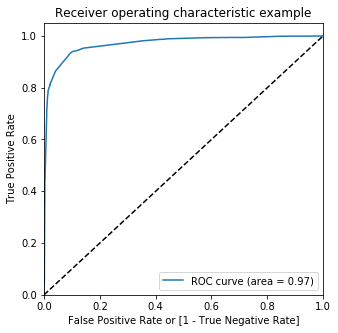

In [760]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### ROC Curve Area=0.97 

### Step 10: Finding Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.

In [815]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(2)

,Converted,Converted_Prob,Prospect ID,Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3096,1,0.999957,2354,1,100.0,1,1,1,1,1,1,1,1,1,1,1
2484,1,0.999957,4830,1,100.0,1,1,1,1,1,1,1,1,1,1,1


In [762]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380255  1.000000  0.000000
0.1   0.1  0.894977  0.952381  0.859756
0.2   0.2  0.908361  0.941615  0.887957
0.3   0.3  0.916234  0.933747  0.905488
0.4   0.4  0.916863  0.926294  0.911077
0.5   0.5  0.923004  0.864596  0.958841
0.6   0.6  0.916234  0.815735  0.977896
0.7   0.7  0.915289  0.811594  0.978913
0.8   0.8  0.909935  0.787164  0.985264
0.9   0.9  0.903165  0.765631  0.987551


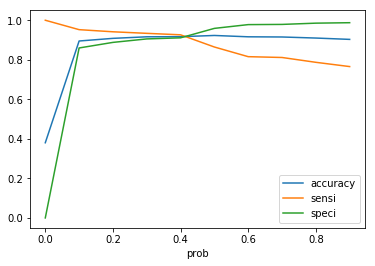

In [763]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [764]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.994624,7113,1,99.46,1,1,1,1,1,1,1,1,1,1,1
1,0,0.005636,4749,0,0.56,1,0,0,0,0,0,0,0,0,0,0
2,0,0.243744,7986,0,24.37,1,1,1,0,0,0,0,0,0,0,0
3,1,0.994624,1281,1,99.46,1,1,1,1,1,1,1,1,1,1,1
4,1,0.994624,7346,1,99.46,1,1,1,1,1,1,1,1,1,1,1


In [765]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9168634860651866

In [766]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3586,  350],
       [ 178, 2237]], dtype=int64)

In [767]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [768]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.9262939958592132

#### Recall is High with low cutoff.

In [769]:
# Let us calculate specificity

TN / float(TN+FP)

0.9110772357723578

In [770]:
# Calculate false positive rate

print(FP/ float(TN+FP))

0.08892276422764228


In [771]:
# Positive predictive value 

print (TP / float(TP+FP))

0.8647081561654426


In [772]:
# Negative predictive value

print (TN / float(TN+ FN))

0.9527098831030818


## Precision and Recall

In [773]:
#Looking at the confusion matrix again

In [774]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3774,  162],
       [ 327, 2088]], dtype=int64)

##### Precision
TP / TP + FP

In [775]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.928

##### Recall
TP / TP + FN

In [776]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8645962732919255

Using sklearn utilities for the same

In [777]:
from sklearn.metrics import precision_score, recall_score

In [778]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.928

In [779]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8645962732919255

### Precision and recall tradeoff

In [780]:
from sklearn.metrics import precision_recall_curve

In [781]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       1
 4       1
 5       1
 6       1
 7       0
 8       0
 9       0
 10      0
 11      1
 12      0
 13      1
 14      0
 15      0
 16      0
 17      0
 18      1
 19      1
 20      0
 21      0
 22      1
 23      0
 24      1
 25      1
 26      0
 27      0
 28      0
 29      1
        ..
 6321    1
 6322    0
 6323    0
 6324    1
 6325    1
 6326    0
 6327    0
 6328    0
 6329    0
 6330    1
 6331    1
 6332    0
 6333    0
 6334    0
 6335    0
 6336    1
 6337    0
 6338    0
 6339    1
 6340    0
 6341    0
 6342    1
 6343    0
 6344    0
 6345    0
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       1
 1       0
 2       0
 3       1
 4       1
 5       1
 6       1
 7       0
 8       0
 9       0
 10      0
 11      1
 12      0
 13      1
 14      0
 15      1
 16      0
 17      0
 18      1
 19      1
 20      0
 21      0
 22      1
 23      0
 24      0
 25      

In [782]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

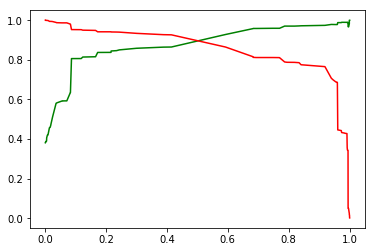

In [783]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### The optimal value of threshold(cutoff) could be chosen as 0.5 value in order to have correct predictions.

### Step 11: Making predictions on the test set

In [784]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_NotAvailable,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,What is your current occupation_NotAvailable
4703,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
5544,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5520,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1342,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4101,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [785]:
X_test.shape

(2722, 15)

In [786]:
X_test_sm = sm.add_constant(X_test)

In [787]:
X_test_sm.shape

(2722, 16)

Making predictions on the test set

In [788]:
y_test_pred = res.predict(X_test_sm)

In [789]:
y_test_pred[:10]

4703    0.994624
5544    0.083554
5520    0.300690
1342    0.002091
4101    0.216629
569     0.414975
7011    0.083554
3433    0.019800
8800    0.024945
2429    0.166002
dtype: float64

In [790]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [791]:
# Let's see the head
y_pred_1.head()

,0
4703,0.994624
5544,0.083554
5520,0.300690
1342,0.002091
4101,0.216629


In [792]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [793]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [794]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [795]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [796]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4703,0.994624
1,0,5544,0.083554
2,0,5520,0.300690
3,1,1342,0.002091
4,0,4101,0.216629


In [797]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [798]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [799]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4703,1,0.994624
1,5544,0,0.083554
2,5520,0,0.300690
3,1342,1,0.002091
4,4101,0,0.216629


In [800]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [801]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4703,1,0.994624,1
1,5544,0,0.083554,0
2,5520,0,0.300690,0
3,1342,1,0.002091,0
4,4101,0,0.216629,0


In [802]:
y_pred_final['Lead_Score']= round(y_pred_final['Converted_Prob']*100, 2)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4703,1,0.994624,1,99.46
1,5544,0,0.083554,0,8.36
2,5520,0,0.300690,0,30.07
3,1342,1,0.002091,0,0.21
4,4101,0,0.216629,0,21.66


In [803]:
y_pred_final.shape

(2722, 5)

In [804]:
y_pred_final=y_pred_final.sort_values(by= 'Lead_Score', ascending=False)
                                                    
                                                                                          
y_pred_final.head(20)                                   

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
907,2584,1,0.999892,1,99.99
1965,8412,1,0.999892,1,99.99
882,7987,1,0.999539,1,99.95
1338,2764,1,0.999539,1,99.95
2321,746,0,0.999539,1,99.95
567,373,1,0.999162,1,99.92
434,3286,1,0.999162,1,99.92
857,2118,1,0.998843,1,99.88
972,2368,1,0.998843,1,99.88
1228,8423,1,0.998843,1,99.88


In [805]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9246877296105804

In [806]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1636,   66],
       [ 139,  881]], dtype=int64)

In [807]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [808]:
# Let's see the sensitivity/ Recall  of our logistic regression model

TP / float(TP+FN)

0.8637254901960785

In [809]:
# Let's see the precision/ positive predictive value  of our logistic regression model

TP / float(TP+FP)

0.9303062302006336

#### Precision is HIgh with high cutoff.

In [810]:
# Let us calculate specificity

TN / float(TN+FP)

0.9612220916568742

#### Generating Lead_Score for Complete Dataset (Train & Test)  choosing the Converted_Probability Cut-off=0.5

In [811]:
data_full= pd.concat([y_train_pred_final,y_pred_final])

data_full= data_full[['Prospect ID','Converted', 'Converted_Prob', 'final_predicted','Lead_Score']]

data_full['Hot_Lead']= np.where(data_full['Lead_Score']>= 80 ,  'Yes', 'No')   
data_full.head(20)

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score,Hot_Lead
0,7113,1,0.994624,1,99.46,Yes
1,4749,0,0.005636,0,0.56,No
2,7986,0,0.243744,0,24.37,No
3,1281,1,0.994624,1,99.46,Yes
4,7346,1,0.994624,1,99.46,Yes
5,8087,1,0.959645,1,95.96,Yes
6,6710,1,0.994624,1,99.46,Yes
7,1248,0,0.071672,0,7.17,No
8,1429,0,0.083554,0,8.36,No
9,2178,0,0.414975,1,41.50,No


#### Sorted Dataset

In [812]:
y_train_pred_final= y_train_pred_final.sort_values(by= 'Lead_Score', ascending=False)


In [814]:
data_full= pd.concat([y_train_pred_final,y_pred_final])

data_full= data_full[['Prospect ID','Converted', 'Converted_Prob', 'final_predicted','Lead_Score']]

data_full['Hot_Lead']= np.where(data_full['Lead_Score']>= 80 ,  'Yes', 'No')  
data_full.head(20)

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score,Hot_Lead
3096,2354,1,0.999957,1,100.00,Yes
2484,4830,1,0.999957,1,100.00,Yes
2421,4693,1,0.999957,1,100.00,Yes
2378,3736,1,0.999892,1,99.99,Yes
503,4812,1,0.999892,1,99.99,Yes
1099,3339,1,0.999892,1,99.99,Yes
6044,4062,1,0.999892,1,99.99,Yes
5394,1386,1,0.999892,1,99.99,Yes
2001,1365,1,0.999666,1,99.97,Yes
3853,1965,1,0.999666,1,99.97,Yes


### For having Conversion Rate equal or above 80%,  Choose topmost  customers from the sorted dataset 

### CONCLUSIONS 



#### Converted_prediction could be done using the below equation :   from (model 5)


###  Converted =  1 / ( 1+e ^ -(9.29 * Tags_Lost to EINS +  8.375* Tags_Closed by Horizzon  + 6.83 * Tags_Will revert after reading the mail  + ..............))                                                                                                                                                                                                                 

#### Optimal cutoff probability is that probability  where we get balanced sensitivity and specificity & Precision.

#### Its evident that, when Threshold is HIGH, Precision is HIGH &  When threshold is LOW, Sensitivity/Recall is HIGH.

#### There is always a Trade-off between Precision & Recall & thus its totally dependent on choosing an optimum Converted_Probability Cut-off in order to  correctly predict the values of target variable  to have good precision, recall & ROC curve area.

#### Here If we choose Cutoff as 0.5 then Precision is going to be HIGH that means Conversion Rate is going to be High as you will be targetting only people who are hot leads,  the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

#### If we choose cutoff as 0.4 then Recall is going to be HIGH i,e if you have resources available then this case would work to give better Conversion Rate, where you need to call  many people even to those who are not hot leads in order to have good conversion rate.

